<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/algoritmos_geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Algortimos genéticos con R

Nombre: Juan Manuel Gutiérrez García 

Fecha: 

Los algoritmos genéticos (AGs) fueron inventados por John Holland en la universidad de Michigan en 1970s (2016—ESSENTIALS). Los algoritmos genéticos están basados en los principios de la selección natural. Los elementos básicos de la selección natural; reproducción, cruzamiento y mutación, son usados en el procedimiento (2009—modern methods). Específicamente, los AGs simulan los procesos biológicos que permiten a las consecutivas generaciones en una especie adaptarse a su ambiente. El proceso de adaptación es aplicado principalmente a través de la herencia de padres a hijos y a través de la supervivencia de los más aptos. Actualmente, los algoritmos genéticos son considerados como uno de los tipos de metahuerísticas más aplicadas (2004—Studies on metaheuristics).

Los AGs comienzan con una población inicial de soluciones. A las soluciones en un población se les llama individuos. En la presentación orginal de los AGs los individuos en la población son representados mediante números binarios. Esta representación suele ser conveniente al momento de implementar las operaciones del algoritmo genético. Por lo anterior, en esta sección nos limitamos a explicar el funcionamiento de los algortimos genéticos mediante una representación de individuos en forma de números binarios. No obstante, es importante considerar que actualmente existen versiones de AGs donde se representa a los individuos en la población como vectores de valor real. A la representación en forma de número binario de un individuo se le denomina cromosoma. El cromosoma consiste en un número fijo de bits los cuales son llamados genes. Con el objetivo de evaluar y clasificar cromosomas en una población una función fitness, basada en la función objetivo, debe ser definida. El valor de la función fitness evaluada en un determinado cromosoma se conoce como el fitness de ese cromosoma. Tres operadores deben ser especificados para construir la estructura completa de un algoritmo genético; operadores de selección, cruce y mutación. El operador de selección se encarga de seleccionar una población de cromosomas padres de la población actual con el objetivo de ser usada por los otros operadores de cruce y mutación. En este proceso de selección, los cromosomas con mayor fitness tienen mayor probabilidad de ser seleccionados que aquellos con un valor fitness bajo. En el proceso de cruce, pares de cromosomas en la población de padres son elegidos aleatoriamente para ser cruzados y generar la descendencia. Con el objetivo de incrementar la diversidad, el operador de mutación es aplicado para modificar uno o más genes de un cromosoma elegido aleatoriamente. Un ciclo de reproducción, cruzamiento y mutación es conocido como una generación.  




1.	Una población de individuos es usada para empezar el proceso en lugar de una sola solución.  Debido a que varias soluciones son usadas, los AGs son menos propensos a quedarse atrapados en óptimos locales

2.	Los AGs usan solo el valor de la función objetivo. Las derivadas no se usan en el proceso de búsqueda

3.	En los AGs las soluciones se representan como cadenas de variables binarias a las que se les llaman cromosomas. Por lo tanto, el método de búsqueda es naturalmente aplicable para resolver problemas de programación discreta y entera. Para obtener soluciones de valor real, una función que convierta las variables binarias en reales debe ser empleada

4.	El valor de la función objetivo evaluada en una solución representa la bondad de esta solución y se le llama el fitness de la solución.  

5.	Una nueva generación de cromosomas se forma a través de la aplicación de tres operadores genéticos; la selección de individuos en la población actual para obtener a los padres (cromosomas que se usan para generar la siguiente generación), cruzamiento de de estos padres para generar hijos (cromosomas obtenidos a través de la combinación de los cromosomas padres) y la mutación de los hijos. A pesar de la aleatorización, los AGs no son simples técnicas de búsqueda aleatorias. Ellos exploran eficientemente las nuevas combinaciones con el conocimiento disponible para encontrar una nueva generación con mejore fitness. 

### Ejemplo para mostrar el funcionamiento de los AGs

Con el objetivo de explicar el funcionamiento de los AGs se mostrará la implementación de un AG para resolver un problema de optimización relativamente sencillo. 

El problema que se usará como ejemplo es el siguiente.

Maximizar:

$$
f(x) = \text{sen}{\left( \frac{\pi x}{2^\text{bits}} \right)} \tag{1}
$$

Sujeto a:

$$
0 < x < 250 \tag{2}
$$

$$
x = \sum_{i=1}^D b(i) 2^{i-1} \tag{3}
$$


donde $x$ es la versión entera de un número binario $b$ y $\text{bits}$ es el número de bits en este número binario. El rango de búsqueda es de 0 a 250. En este ejemplo se emplean ocho bits para poder cubrir todo el rango de búsqueda, es decir $\text{bits} = 8$.


hola 

In [1]:
# número de bits necesarios para cubrir el rango de búsqueda
bits = ceiling(log(250,2))
bits

[1] 8

In [2]:
#@title función para graficar la función objetivo
objetivo_grafica = function(x, bits) {

    f = sin(pi*(as.numeric(x))/(2^bits))

    return(f)
}

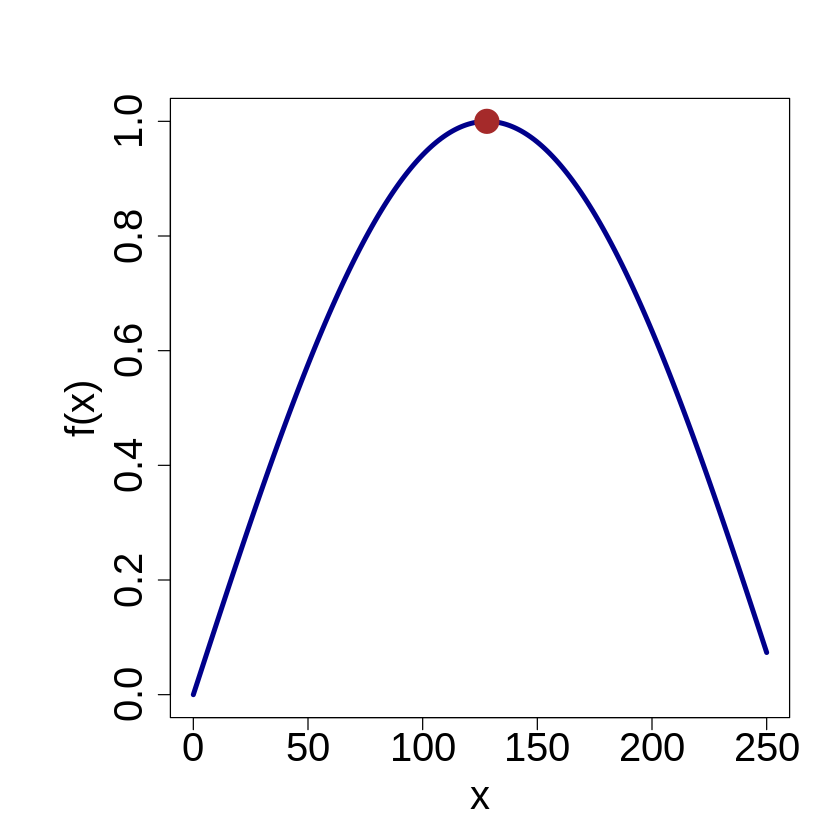

In [3]:
#@title graficar función objetivo
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x", ylab = "f(x)")
points(128,1,col = "brown", cex = 4, pch = 20)

Figura 1. 

En la Fig. 1 se muestra la gráfica de la función (1). Pese a que esta función es sencilla y obtener su máximo no requiere el uso de AGs se emplea para explicar los conceptos relacionados con la implenentación de AGs. 

### Codificación 

La codificación de las soluciones se refiere a la forma en la que las soluciones en la población son representadas. Existen dos principales tipos de representaciones en un AG. La condificación como números binarios y la codificación como números reales. La codificación binaria fue presentada con la version original de los AGs. La codificación real puede ser necesaria si el problema que se está resolviendo requiere el uso de vectores de valor real. En este último caso es posible programar un algoritmo genético que trabaje completamente con vectores reales o emplear una función que permita transformar vectores de tipo binario a vectores de tipo real.  

Para el ejemplo que se analiza en esta sección se requieren una representación de las soluciones como números binarios, ya que el óptimo de (1) es $x = 128$, que en su forma de número binario se expresa como $b = (1,0,0,0,0,0,0,0)$. Por esta razón es necesaria la función (2) que permite convertir un número binario en un número entero. 

In [4]:
#@title función para transformar binario en entero
binario_a_entero = function(binario) {

    index = (length(binario)-1):0

    entero = sum(2^{index}*binario)

    return(entero)
}

In [5]:
binario_a_entero(c(1,0,0,0,0,0,0,0))

[1] 128

Una vez que se cuenta con esta función es posible crear una población de individuos representados como números binarios y luego transformarlos para obtener su valor equivalente como números enteros.
Por ejemplo el número binario $b = (0,1,0,0,0,1,0,0)$ se transforma a su forma entera para dar 68. En el ejemplo se usan 8 bits para representar cada número binario ya que este número de bits permite representar un valor máximo 255, con lo que se cubre todo el espacio de búsqueda de 0 a 250. 

Tabla 1. Representación como número binario y como número entero de posibles soluciones del problema de optimización del ejemplo 

| número binario | número entero | fitness |
|:---:|:---:|:---:|
| 01000100 | 68 | 0.7409511 |
| 01101101 | 109 | 0.97294 |
| 11101101 | 237 | 0.2310581


In [6]:
bin1 = c(0,1,0,0,0,1,0,0)
sol1 = binario_a_entero(bin1)
print(sol1)
bin2 = c(0,1,1,0,1,1,0,1)
sol2 = binario_a_entero(bin2)
print(sol2)
bin3 = c(1,1,1,0,1,1,0,1)
sol3 = binario_a_entero(bin3)
print(sol3)

[1] 68
[1] 109
[1] 237


In [7]:
# función objetivo
objetivo = function(binario) {

    bits = length(binario)

    entero = binario_a_entero(binario) 

    f = sin(pi*(as.numeric(entero))/(2^bits))

    return(f)

}

In [8]:
fit1 = objetivo(bin1)
print(fit1)
fit1 = objetivo(bin2)
print(fit1)
fit1 = objetivo(bin3)
print(fit1)

[1] 0.7409511
[1] 0.97294
[1] 0.2310581


In [9]:
#@title función para crear individuo 
crear_individuo = function(bits, pool) {

    individuo = sample(pool, bits, replace = TRUE)

    return(individuo)
}

In [10]:
pool = c(0,1)
ind = crear_individuo(bits, pool)
ind

[1] 1 0 1 0 1 1 1 0

In [11]:
# evaluar objetivo 
objetivo(ind)

[1] 0.8448536

In [12]:
#@title función para crear población

crear_poblacion = function(N, bits, pool) {
    pop = matrix(nrow = N, ncol = bits)
    for (i in 1:N) {

        pop[i,] = crear_individuo(bits, pool)
    }

    return(pop)
}

In [13]:
N = 4
poblacion = crear_poblacion(N, bits, pool)
poblacion

0,1,0,1,0,0,0,0
0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,0
1,1,1,0,1,0,0,0


### Función fitness 

La función fitness es una función que mide que tan buena es una solución. Debe ser establecida de tal forma que una mejor solución tendrá un mayor fitness que peores soluciones.  La función fitness juega un papel fundamental en el proceso de selección. Si se busca maximizar la función objetivo, en algunos casos es posible establecer la función objetivo directamente como la función fitness. Si el problema de optimización busca minimizar la función objetivo, la función fitness tiene que ser planteada de tal forma que el mínimo de la función objetivo corresponda al máximo de la función fitness. Por ejemplo, si se quiere minimizar la función $f(x)$ la función fitness puede ser escrita de la siguiente manera.

$$
\text{fitness}(x) = \frac{1}{1 + f(x)} \tag{5}
$$

De esta manera, el valor $x^{opt}$ que genera el valor máximo de $\text{fitness(x)}$ da lugar al valor mínimo de $f(x)$. El aspecto importante que hay que recrodar es que la mejor solución en el AG tiene que tener el mayor valor de la función fitness. 

In [14]:
# evaluar objetivo 
apply(poblacion, 1, objetivo)

[1] 0.8314696 0.9456073 0.9039893 0.2902847

In [15]:
obtener_fitness = function(pop) {
    # en este caso la función fitness es igual a la función objetivo 
    fitness = apply(pop, 1, objetivo)

    return(fitness)
}

In [16]:
fitness = obtener_fitness(poblacion)
fitness

[1] 0.8314696 0.9456073 0.9039893 0.2902847

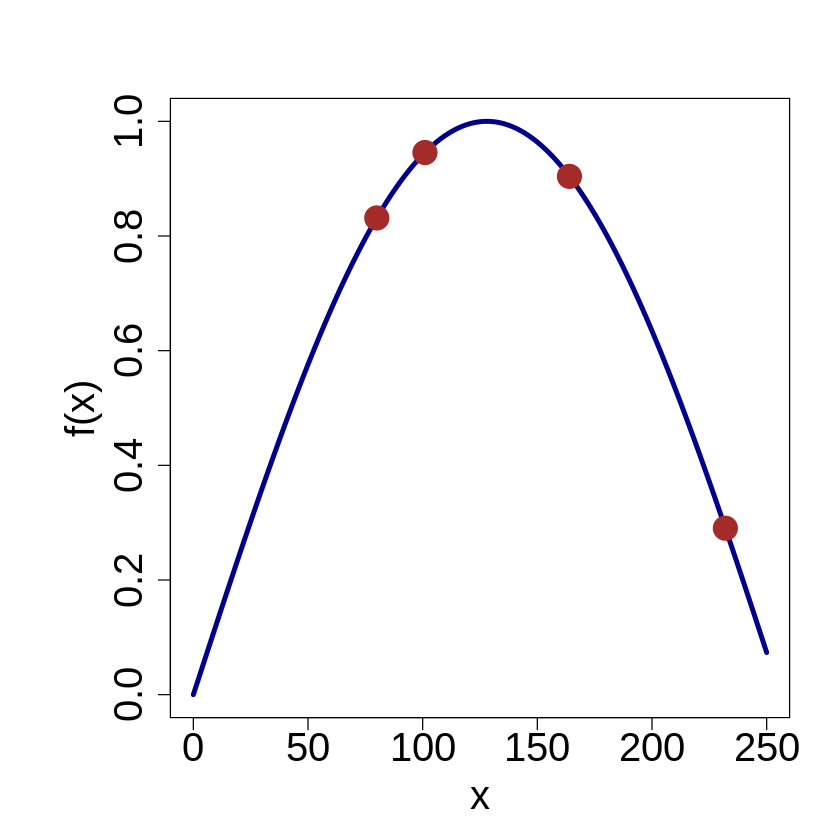

In [17]:
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x", ylab = "f(x)")
points(apply(poblacion,1,binario_a_entero), fitness, col = "brown", cex = 4, pch = 20)

## Selección 

La selección es el primer operador aplicado a la población para seleccionar a los cromosomas con valores de fitness altos y formar la población de padres. El operador de selección se usa para escoger a los cromosomas por arriba del promedio de la población actual e insertar sus múltiples copias en la población de padres basado en un procedimiento probabilístico (2019--modern). 

### Selección proporcional 

El operador de selección más común  para los GAs se denomina selección proporcional al fitness, a veces conocida como selección de ruleta. En este método, se seleccionan a los cromosomas en proporción a su fitness: si un cromosoma tiene un fitness más alto, se selecciona con más frecuencia. Un cromosoma con un fitness alto tiene mayor probabilidad de tener copias de él en la población de padres (2014--esentials). Por lo tanto, si $\text{fitness}(i)$ denota el fitness del cromosoma $i$ en la población de tamaño $N$, la probabilidad de seleccionar al cromosoma $i$ para la población de padres está dada por.

$$
p(i) = \frac{\text{fitness}(i)}{\sum_{j=1}^N\text{fitness}(j)} \tag{6}
$$

donde $p(i)$ es la probabilidad de seleccionar al cromosoma $i$.

Estas probabilidades son usadas para calcular la probabilidad acumulada de cada cromosoma, $p_a(i)$, mediante la adición de las probabilidades del cromosoma 1 hasta el cromosoma $i$. 

$$
p_a(i) = \sum_{j}^{i}p(i) \tag{7}
$$

Nota que el último cromosoma en la población tendrá una probabilidad acumulada $p_a(N)$ igual a 1. Para la selección de un cromosoma se asocia el rango de probabilidad acumulada $p_a(i-1) - p_a(i)$ con el cromosoma $i$ en la población. Posteriormente, se genera un número aleatorio entre 0 y 1 y se escoge el cromosoma que tiene el rango de probabilidad acumulado en donde se encuentra el número aleatorio generado. 

La implementación del proceso de selección proporcional se puede entender si se imagina una rueda de ruleta con su circunferencia dividida en segmentos, uno para cada cromosoma de la población, con las áreas de los segmentos proporcionales al fitness de los cromosomas.  Si se gira la rueda de ruleta $N$ veces ($N$ siendo el tamaño de la población) y seleccionando, cada vez, el cromosoma elegido por el apuntador de la rueda de ruleta, obtenemos una población de padres de tamaño $N$. 

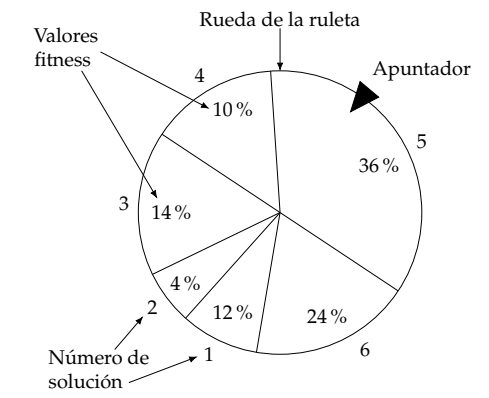

Figura 2. Esquema de selección proporcional. Cada cromosoma en la población tiene un espacio en la ruleta que es proporcional a su fitness. Por lo tanto, los cromosomas con un valor fitness alto tienen mayor probabilidad de ser seleccionados.  

In [18]:
seleccion_proporcional = function(poblacion, fitness, N, bits) {
    padres = matrix(nrow = N, ncol = bits)
    prob = fitness/sum(fitness)
    prob_acum = prob
    for (i in 2:N) {
        prob_acum[i] = prob_acum[i] + prob_acum[i-1]
    }
    for (i in 1:N) {
        rand = runif(1,0,1)
        min = 0
        for (j in 1:length(prob_acum)) {
            if (rand > min & rand < prob_acum[j]) {
                padres[i,] = poblacion[j,]
                break
            }
            min = prob_acum[j]
        }
    }
    return(padres)
} 

Algoritmo para la implementación de la selección proporcional. La función que realiza la selección recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{poblacion}$ que contiene a la población de cromosomas que serán seleccionados. En esta matriz cada renglón contiene a un cromosoma (número binario) y cada columna contiene un gen (bit) de estos cromosomas. Por lo tanto, si la población está compuesta por $N$ individuos con un número de genes igual a $\text{bits}$, la matriz $\text{poblacion}$ tendrá $N$ renglones y $\text{bits}$ columnas. El segundo argumento es un vector llamado $\text{fitness}$ con el valor fitness  de cada cromosoma en la población. El tercer argumento es el número de cromosomas en la población, $N$, y el último argumento es el número de genes, $\text{bits}$, de cada cromosoma en la población. Los pasos del algoritmo son: 

1. Se crear una matriz llamada $\text{padres}$ con las mismas dimensiones que la matriz $\text{poblacion}$ donde se guardarán a las copias de los individuos seleccionados (renglón 2). 

2. Usando la ecuación (3) se obtiene la probabilidad de selección de cada cromosoma, $p(i)$ (renglón 4).

3. Mediante la ecuación (4) se obtiene el rango de probabilidad acumulada para cada cromosoma, $p_a(i)$

Los siguientes pasos se realizan hasta que la población de padres ha sido completada

4. Se genera un valor aleatorio entre 0 y 1 llamado $\text{rand}$

5. Comenzando con el primer cromosoma en la población, se determina si $\text{rand}$ se encuentra dentro del rango de probabilidad acumulada del cromosoma $i$. De ser así, se escoge este cromosoma, de lo contrario, se procede a realizar la prueba con el siguiente cromosoma en la población hasta que un cromosoma es escogido. 

Una vez que se han escogido $N$ copias de los cromosomas en la matriz $\text{poblacion}$ para llenar la matriz $\text{padres}$ el algoritmo regresa la población de padres (renglón 20).

Mediante este procedimiento, el cromosoma con el mayor valor fitness será seleccionado más frecuentemente a la población de padres debido a su mayor rango de probabilidad acumulada. Por esta razón, cromosomas con altos valores fitness en la población probabilísticamente obtienen más copias en la población de padres. Es importante notar que no se forman nuevos cromosomas durante la etapa de selección, solo se copian las cadenas existentes en la población a la población de padres. La etapa de selección garantiza que cromosomas con altos valores fitness sobrevivan y se reproduzcan, y cromosomas menos aptos mueran. 


In [19]:
N = 4
bits = 8
seleccion_proporcional(poblacion, fitness, N, bits)

0,1,1,0,0,1,0,1
0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0


### Selección de torneo

Existe algunos problemas con el método de selección proporcional. Ese método supone que el valor fitness de un cromosoma realmente significa algo importante. Pero a menudo se elige una función fitness tal que los valores grandes sean "mejores" que los más pequeños, y no se pretende implicar nada más (2016--essentials). Además, si un cromosoma posee un valor fitness bastante superior al resto, existe la posibilidad de que varias copias de este cromosoma sean insertadas en la población de padres, con lo cual se reduce rápidamente la diversidad  y se podría converger a un mínimo local. 

En la selección de torneo una muestra de $t$ cromosomas es tomada aleatoriamente de la población. Ellos pueden ser tomados de la población con o sin remplazo. Esta muestra toma parte en un torneo. En este torneo los cromosomas en la muestra compiten para selecciónar el cromosoma que formará parte de la población de padres. El cromosoma ganador es el que posee mayor fitness. El proceso se repite $N$ veces para completar la población de padres. A menudo, el torneo se realiza con dos cromosomas (torneo binario). Sin embargo, esto puede ser generalizado a un número arbitrario de tamaño $t$ llamado tamaño del torneo (1997--a comparison).

La selección de torneo puede además ajustar la presión de selección para adaptarse a diferentes problemas. La presión de selección se incrementa mediante el aumento del tamaño de torneo $t$. Si el tamaño de torneo es grande, los cromosomas débiles (menor fitness) tienen una pequeña probabilidad de ser seleccionados, debido a que si un cromosoma débil se encuentra en una muestra grande de cromosomas hay mayor probabilidad de que exsitan cromosomas más fuertes (mayor fitness). Cuando el tamaño de torneo es 1 el proceso de selección es equivalente a la selección aleatoria, en cambio, cuando el tamaño del torneo es considerablemente superior al tamaño de la población, existe una gran probabilidad de elegir al mejor cromosoma en cada torneo, con lo que la selección se vuelve determinista (1995--Genetic). Un aspecto interesante de este método de selección es que, siempre que se pueda comparar dos individuos cualesquiera y determinar cuál de ellos es mejor, no se necesita el valor real de la función fitness (Hands on GA with Python). 


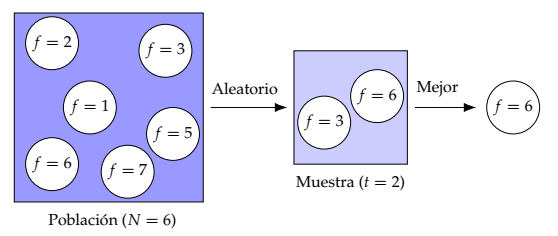

Figura 3. Esquema de selección de torneo. En una población de $N$ individuos se toma una muestra de individuos de tamaño $t$. Se escoge el individuo con mayor fitness en esta muestra para fromar parte de la población de padres. el proceso se repite $N$  veces para completar la población de padres.   

In [20]:
selection_torneo = function(poblacion, t, N, bits) {
    padres = matrix(nrow = N, ncol = bits)
    for (i in 1:N) {
        indices = sample(1:N, t, replace = FALSE)
        individuos = poblacion[indices, ]
        fitness = apply(individuos, 1, objetivo)
        ganador = which.max(fitness)
        padres[i,] = individuos[ganador,]
    }
    return(padres)
}

Algortimo 3. Selección de torneo. La función que realiza la selección recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{poblacion}$ que contiene a la población de cromosomas  de donde se seleccionarán los padres. El segundo argumento es el tamaño de la muestra de cromosomas $t$ que se toma de la población para realizar el torneo. El tercer argumento es el número de cromosomas en la población, $N$, y el último argumento es el número de genes, $\text{bits}$, de cada cromosoma en la población.  

1. El primer paso en el algoritmo es crear una matriz llamada  $\text{padres}$  con las mismas dimensiones que la matriz  $\text{poblacion}$  donde se guardarán a las copias de los cromosomas seleccionados (renglón 2). 

Los siguientes pasos se repiten $N$ número de veces. 

1. Se toma una muestra sin remplazo de $t$ cromosomas de la población (renglón 6 - renglón 7)

2. Se calcula el valor fitness de los cromosomas en la muestra (renglón 9)

3. Se determina quién es el cromosoma ganador, es decir, qué cromosoma posee el mayor fitness (renglón 11)

4. Se inserta el cromosoma ganador en la población de padres (renglón 13)

Una vez que la población de padres ha sido completada el algoritmo regresa la población de padres (renglón 15). 

In [21]:
t = 2
selection_torneo(poblacion, t, N, bits)

0,1,0,1,0,0,0,0
0,1,1,0,0,1,0,1
0,1,0,1,0,0,0,0
1,0,1,0,0,1,0,0


## Cruce

Después de la selección, el operador de cruce es aplicado sobre la población de padres. El propósito del cruce es crear nuevos cromosomas mediante el intercambio de información entre cromosomas en la población de padres. En la mayoría de los operadores de cruce, dos cromosomas son escogidos de la población de padres y algunas partes de estos cromosomas son intercambiadas para generar nuevos cromosomas a los que se les denomina hijos (2009-modern). El cruce de dos cromosomas padres para generar dos individuos hijos no siempre da lugar a mejores cromosomas en términos de su valor fitness. Por esta razón, es conveniente preservar algunos cromosomas padres como parte de la población en la próxima generación.  El cruce se aplica a pares de padres con una probabilidad $p_c$ que suele estar entre 0.6 y 0.8. El operador de cruce juega el papel principal en los AGs, así que definir un operador de cruce adecuado es altamente necesario para lograr un buen resultado del AG (2004-studies).

Debido a que el operador de cruce combina partes de los cromosomas padres (los cuales han sido escogidos por tener valores fitness altos) se espera que los cromosomas hijos resultantes tengan mejores valores fitness siempre que un sitio de cruce adecuado ha sido seleccionado. Sin embargo, el sitio de cruce se escoge de forma aleatoria. Los cromosomas hijos generados usando el sitio de cruce aleatorio podrían o no ser tan buenos o mejores que sus cromosomas padres en términos del valor fitness. Si ellos son tan buenos o mejores que sus padres contribuirán a un rápido mejoramiento en el promedio del valor fitness de la nueva población. Por otro lado, si los hijos creados son peores que sus padres, no sobrevivirán por muchas iteraciones debido a que son menos suceptibles a ser seleccionados en la siguiente etapa de selección (2009-modern)

#### Cruce de un solo punto 

En el método de cruce de un solo punto se elige un sitio de cruce para dividir dos cromosomas padres en dos partes. Las partes que se obtiene son intercambiadas entre los padres para generar dos nuevos cromosomas hijos (2016--essentials). 

En el ejemplo de esta sección donde las soluciones están representados como números binarios, un sitio de cruce es seleccionado a lo largo de la longitud de los números binarios. Una vez que se establece el sitio de cruce, los bits de los números binarios padres de cada lado del sitio de cruce son intercambiados para generar nuevos números binarios hijos. 

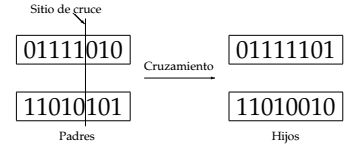

Figura 4. Esquema de cruzamiento de un solo punto. Se escoge un sitio en la cadana de bits y se intercambian las partes de los padres en ambos lados del sitio para generar don hijos. 

In [22]:
cruzamiento_un_punto = function(padres, pc, N, bits) {
    hijos = matrix(nrow = N, ncol = bits)
    for (i in 1:(N/2)) {
        p1 = padres[2*i-1, ]
        p2 = padres[2*i, ]
        rand = runif(1,0,1)
        if (rand < pc) {
            sc = sample(2:(bits-1), 1)
            p11 = p1[1:sc]
            p12 = p1[(sc+1):bits]   
            p21 = p2[1:sc]
            p22 = p2[(sc+1):bits]
            c1 = c(p11,p22)
            c2 = c(p21,p12)
            hijos[2*i-1, ] = c1
            hijos[2*i, ] = c2
        }
        else {
            hijos[2*i-1, ] = p1
            hijos[2*i, ] = p2
        }
    }
    return(hijos)
}

Algoritmo para la implementación del cruce de un punto. La función que realiza el cruce recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{padres}$ que contiene a la población de cromosomas padres. El segundo argumento es la probabilidad de que se realice el cruce $p_c$. El tercer argumento es el número de cromosomas en la población, $N$, y último argumento es el número de genes de cada individuo en la población $\text{bits}$. 

1. El primer paso es crear una matriz llamada $\text{hijos}$ donde se guardan los hijos generados en la etapa de cruce. Naturalmente, las dimensiones de esta matriz deben ser las mismas que las de $\text{padres}$ (renglón 2). 

Luego se realizan los siguientes pasos por un $N/2$ número de veces. 

2. Se seleccionan dos cromosomas padres de la población de padres (renglón 6 - renglón 7)

3. Se genera un número aleatorio entre 0 y 1 llamado $\text{rand}$ (renglón 9)

4. Si el número aleatorio generado en el paso 3 es menor que $p_c$ se realizan los pasos 5 a 8, de lo contrario se lleva a cabo el paso 9

5. Se escoge un sitio en la cadena de bits para realizar el cruce entre los padres seleccionados (renglón 12)

6. Se separa cada cromosoma padre en dos partes divididas por el sitio de cruce (renglón 14 - renglón 19)

7. Se toman las partes de los padres del paso 5 y se intercambian para generar dos individuos hijos (renglón 19 - renglón 20)

8. Se insertan los dos cromosomas hijos generados en la población de hijos (renglón 22 - renglón 25)

9. En caso de que no se realice el cruce, se insertan los dos padres seleccionados en la población de hijos sin sufrir ningún cambio

Una vez que la población de hijos ha sido completada el algoritmo regresa la población de hijos.


In [23]:
pc = 0.8
cruzamiento_un_punto(poblacion, pc, N, bits)

0,1,0,0,0,1,0,1
0,1,1,1,0,0,0,0
1,0,1,0,0,1,0,0
1,1,1,0,1,0,0,0


### Cruce uniforme 

El problema con el cruce de un solo punto reside en la posible vinculación entre los elementos de un cromosoma. Nota como la probabilidad de separar el primer y el último elemento en un cromosoma es alta mediante el cruzamiento de un solo punto, ya que casi cualquier sitio de cruce logrará esto. De manera similar, la probabilidad de separar dos elementos consecutivos es baja, ya que se requiere un sitio específico de cruce para lograr esto.  Si la organización del cromosoma es tal que los elementos en los extremos deben trabajar juntos en tándem con el objetivo de alcanzar un valor fitness alto, se estarían rompiendo constantemente buenos pares de individuos que se generan en la búsqueda. 
Es posible tratar a todos los elementos en un cromosoma de forma justa con respecto a la vinculación a través de realizar el cruce en cada posición de forma independiente de las demás posiciones. En el cruce uniforme se recorren los elementos en un par de cromosomas padres y se realiza un intercambio de los elementos entre los padres con una determinada probabilidad. 


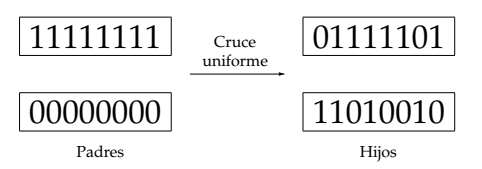

Figura 5. Esquema del cruce uniforme para dos cromosomas binarios. Cada bit en los cromosomas padres tiene una probabilidad $p_c$ de ser intercambiado.

In [37]:
cruzamiento_uniforme = function(padres, pc, N, n_b) {
    hijos = matrix(nrow = N, ncol = n_b)
    for (i in 1:(N/2)) {
        p1 = padres[2*i-1, ]
        p2 = padres[2*i, ]
        for (j in 1:n_b) {
            rand = runif(1,0,1)
            if (rand < pc) {
                aux = p1[j]
                p1[j] = p2[j]
                p2[j] = aux
            }
        }
        c1 = p1
        c2 = p2
        hijos[2*i-1, ] = c1
        hijos[2*i, ] = c2
    }
    return(hijos)
}

Algoritmo para la implementación del cruzamiento uniforme. La función que realiza el cruce recibe cuatro argumentos. El primer argumento es una matriz $\text{padres}$ que contiene a la población de cromosomas padre. El segundo argumento es la probabilidad de que se realice el cruce $p_c$. El tercer argumento es el número de individuos en la población, $N$, y último argumento es el número de genes de cada cromosoma en la población, $\text{bits}$. 

1. El primer paso es crear una matriz llamada $\text{hijos}$ donde se guardan los hijos generados en la etapa de cruce (renglón 2). 

Luego se realizan los siguientes pasos por un $N/2$ número de veces. 

2. Se seleccionan dos individuos padres de la población de padres (renglón 6 - renglón 7)


4. Se recorre cada posición en los cromosomas padres y se genera un número aleatorio entre 0 y 1 (renglón 11)

5. Si el número aleatorio generado en el paso 4 es menor que $p_c$ se intercambian los bits en la posición actual de los padres (renglón 12 - renglón 15)

6. Se utilizan los dos padres seleccionados (con o sin posiciones intercambiadas) para generar dos hijos (renglón 19 - renglón 20) 

7. Se insertan los dos cromosomas hijos generados en la población de hijos (renglón 22 - renglón 25)

Una vez que la población de hijos ha sido completada el algoritmo regresa la población de hijos.


In [42]:
cruzamiento_uniforme(poblacion, pc, 4, bits)

0,1,0,0,0,1,0,1
0,1,1,1,0,0,0,0
1,1,1,0,0,1,0,0
1,0,1,0,1,0,0,0


In [26]:
poblacion

0,1,0,1,0,0,0,0
0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,0
1,1,1,0,1,0,0,0


### Mutación 

La mutación es el último operador genético que se aplica en el proceso de creación de una nueva generación. El operador de mutación se aplica a la descendencia que se creó como resultado de los operadores de selección y cruce. 

La mutación no ocurre siempre, sino que se presenta con cierta probabilidad y generalmente es una probabilidad baja, ya que conlleva el riesgo de dañar el desempeño de cualquier individuo al que se le aplique. Si la tasa de mutación aumenta excesivamente, el AG se convertirá en el equivalente a una búsqueda aleatoria (hands on).

El propósito de la operación de mutación es cambiar los genes de la descendencia y aumentar la diversidad de la población. Este proceso permite que los GAs salten de soluciones locales o subóptimas para evitar una convergencia prematura. 

#### Mutación de un solo bit 
En la mutación de un solo bit, cuando el cromosoma es de tipo binario, un sitio de mutación a lo largo de la cadena de bits es seleccionado de forma aleatoria. El dígito en la posición seleccionada es volteado de 0 a 1 o de 1 a 0 con una probabilidad $p_m$. Este proceso solo ocurre una vez en cada individuo, por lo cual solo uno de sus bits puede llegar a ser volteado.

#### Mutación de bit a bit
En la mutación de bit a bit cada bit de cada cromosoma (cadena de bits) es considerado uno a la vez en sencuencia. El dígito es volteado de 0 a 1 o de 1 a 0 con una probabilidad $p_m$. A diferencia de la mutación de un solo bit, en este tipo de mutación es posible mutar varios de los bits en el cromosoma. 


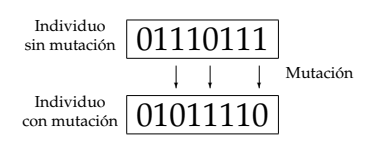

Figura 6. Esquema de la mutación de bit a bit. En este ejemplo se aprecia como tres de los bits en el individuo original han sido volteados con lo que se genera un nuevo individuo mutado. En la mutación de un solo bit solo es posible voltear un bit en cada individuo. 

In [27]:
mutacion_un_punto = function(hijos, pm, N, n_b) {
    hijos_mut = matrix(nrow = N, ncol = n_b)
    for (i in 1:N) {
        hijo = hijos[i, ]
        rand = runif(1,0,1)
        if (rand < pm) {
            mut = sample(1:n_b,1)
            n_b = hijo[mut]
            hijo[mut] = ifelse(n_b == 0, 1, 0)
            hijos_mut[i, ] = hijo 
        }
        else {
            hijos_mut[i, ] = hijo
        }
    }
    return(hijos_mut) 
}

Algoritmo para la implementación de la mutación de un solo bit. La función que realiza la mutación recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{hijos}$ que contiene a la población de cromosomas hijos que serán mutados. El segundo argumento es la probabilidad de que se realice la mutación $p_m$. El tercer argumento es el número de individuos en la población, $N$, y último argumento es el número de genes de cada individuo en la población, $\text{bits}$. El primer paso es crear una matriz llamada $\text{hijos_mut}$ donde se guardan los hijos mutados generados en la etapa de cruce. Luego se realizan los siguientes pasos por un $N$ número de veces. 

1. Se seleciona un individuo hijo de la población de hijos

2. Se genera un número aleatorio entre 0 y 1 llamado $\text{rand}$

3. Si el número aleatorio generado en el paso 2 es menor que $p_m$ se realizan los pasos 4 a 6, de lo contrario se realiza el paso 7

4. Se escoge un sitio de mutación de forma aleatoria 

5. Se voltea el bit en el sitio de mutación escogido

6. Se introduce el individuo hijo mutado en la población de hijos mutados

7. Si el número aleatorio generado en el paso 2 es mayor que $p_m$ se inserta el cromosoma hijo sin nungún cambio en la población de hijos mutados

Una vez que la población de hijos mutados ha sido completada el algoritmo regresa la población de hijos mutados.


In [28]:
pm = 0.5
mutacion_un_punto(poblacion,pm,N, bits)

0,1,0,1,0,0,0,0
0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,0
1,1,1,0,1,0,0,0


In [29]:
poblacion

0,1,0,1,0,0,0,0
0,1,1,0,0,1,0,1
1,0,1,0,0,1,0,0
1,1,1,0,1,0,0,0


In [30]:
mutacion_uniforme = function(hijos, pm, N, bits) {
    # matriz para guardar los hijos mutados generados
    hijos_mut = matrix(nrow = N, ncol = bits)
    # el algoritmo de desplaza por cada individuo
    for (i in 1:N) {
        # y por cada bit en cada individuo
        for (j in 1:bits) {
            # decidir si el bit en la posición actual será volteado
            rand = runif(1,0,1)
            if (rand < pm) {
                # voltear el bit 
                bit = hijos[i,j]
                hijos_mut[i,j] = ifelse(bit == 0, 1, 0)
            }
            else {
                # si no se voltea el bit entonces los dejas sin ningún cambio
                hijos_mut[i,j] = hijos[i,j]
            }
        }
    }
    # regresar a la población de hijos 
    return(hijos_mut)
}

Algoritmo para la implementación de la mutación de bit a bit. La función que realiza la mutación recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{hijos}$ que contiene a la población de individuos. El segundo argumento es la probabilidad de que se realice la mutación $p_m$. El tercer argumento es el número de individuos en la población, $N$, y el último argumento es el número de genes de cada individuo en la población $\text{bits}$. 

1. El primer paso es crear una matriz llamada $\text{hijos_mut}$ donde se guardan los hijos mutados generados en la etapa de cruce. Naturalmente, las dimensiones de esta matriz deben ser las mismas que las de $\text{hijos}$ (renglón 2) 

Luego se realizan los siguientes pasos para cada bit en la población de hijos. 

1. Se genera un número aleatorio entre 0 y 1 llamado $\text{rand}$

2. Si el número aleatorio generado en el paso 1 es menor que $p_m$ entonces realizar el paso 3, de lo contrario realizar el paso 4

3. Voltear el bit en la población actual e insertarlo en la población de hijos mutados

4. Insertar el bit actual en la población de hijos mutados sin nungún cambio

Una vez que la población de hijos mutados ha sido completada el algoritmo regresa la población de hijos mutados.


In [31]:
mutacion_uniforme(poblacion, pm, N, bits)

1,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0
1,0,1,0,1,0,1,1
1,1,0,0,0,1,0,1


Los operadores de selección, cruce y mutación se aplican por un número específico de iteraciones, que se denomina número de generaciones. Al final de este proceso iterativo se espera obtener una población de individuos con un fitness alto. Generalmente, se emplea un criterio para determinar si el algoritmo se debe detener. Este criterio puede ser el número de generaciones, una valor específico en la variación del fitness entre los individuos de la población, o un número de generaciones específico sin que se perciba ningún aumento en el fitness de la población. Los algoritmos genéticos no garantizan la obtención de un óptimo global, pero si suelen dar buenos resultados en un tiempo de cómputo razonable. Para el buen desempeño de los AGs es necesario definir de forma adecuado los parámetros del algoritmo como son: tamaño de población $N$, número de generaciones $\text{gen}$, probbilidad de cruce $p_c$ y probabilidad de mutación $p_m$. Un algoritmo genético desarrollado con las funciones de seleección, cruce y mutación mostradas en esta sección puede ser encontrado en el siguiente link.  

In [32]:
algoritmo_genetico = function(N, generaciones,bits, pc, pm) {

    # crear nueva población
    pop = crear_poblacion(N, bits, pool)

    # obtener fitness 
    fitness = obtener_fitness(pop)

    # guardar registro de mejor solución actual 
    mejor_ind = numeric(length = generaciones)
    indice = which.max(fitness)
    mejor_ind[1] = binario_a_entero(pop[indice, ])
    mejor_fitness = numeric(length = generaciones)
    mejor_fitness[1] = fitness[indice]

    # operadores genéticos
    for (i in 2:generaciones) {

        # seleccionar los padres que se cruzarán 
        padres = seleccion_proporcional(pop, fitness, N, bits)

        # cruzar padres para generar hijos
        hijos = cruzamiento_un_punto(padres, pc, N, bits)

        # mutar hijos
        hijos = mutacion_un_punto(hijos, pm, N, bits)

        # actualizar población
        pop = hijos

        # obtener fitness 
        fitness = obtener_fitness(pop)

        # guardar registro de mejor solución actual 
        indice = which.max(fitness)
        mejor_ind[i] = binario_a_entero(pop[indice, ])
        mejor_fitness[i] = fitness[indice]

    }

    return(list(mejor_ind = mejor_ind, mejor_fitness = mejor_fitness))
}

In [33]:
N = 6
generaciones = 200
bits = bits
pc = 0.7
pm = 0.1
sol = algoritmo_genetico(N, generaciones, bits, pc, pm)

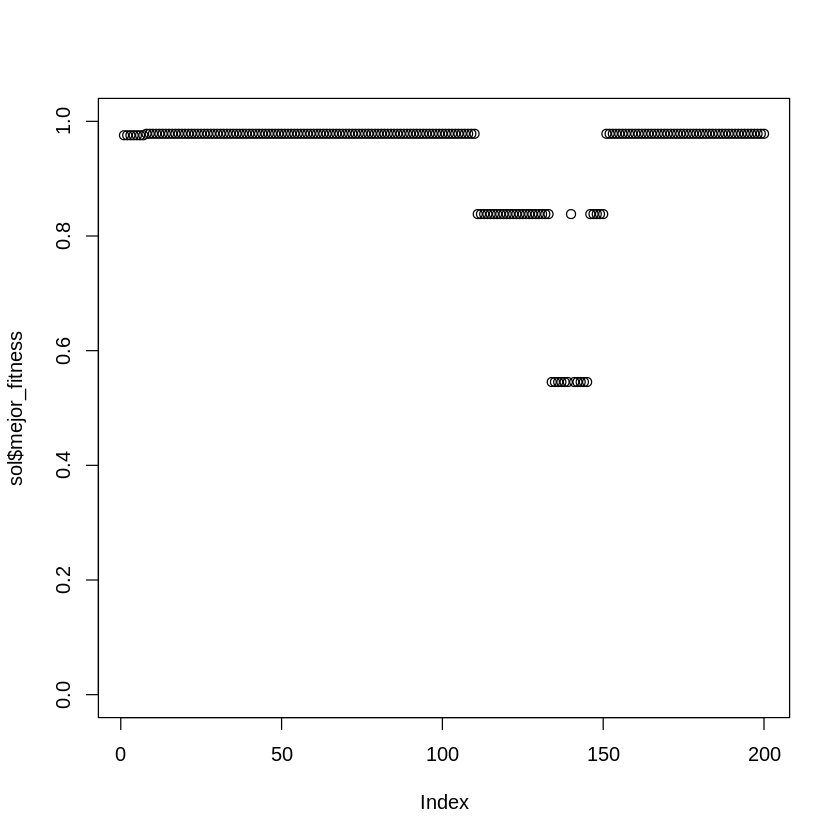

In [34]:
plot(sol$mejor_fitness, ylim = c(0,1))

In [35]:
sol$mejor_ind

[1] 110 110 110 110 110 110 110 111 111 111 111 111 111 111 111 111 111 111
 [19] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
 [37] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
 [55] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
 [73] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
 [91] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[109] 111 111 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175
[127] 175 175 175 175 175 175 175  47  47  47  47  47  47 175  47  47  47  47
[145]  47 175 175 175 175 175 111 111 111 111 111 111 111 111 111 111 111 111
[163] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[181] 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111
[199] 111 111